<a href="https://colab.research.google.com/github/andrea02polimi/RL-projects/blob/main/03_gpomdp_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# G(PO)MDP

This notebook is inspired to the Stable Baselines3 tutorial available at [https://github.com/araffin/rl-tutorial-jnrr19](https://github.com/araffin/rl-tutorial-jnrr19).


## Introduction

In this notebook, we will learn how to build a customized environment with **Gymnasium**.

### Links

Gymnasium Github: [https://github.com/Farama-Foundation/Gymnasium](https://github.com/Farama-Foundation/Gymnasium)

Gymnasium Documentation: [https://gymnasium.farama.org/index.html](https://gymnasium.farama.org/index.html#)

Stable Baselines 3 Github:[https://github.com/DLR-RM/stable-baselines3](https://github.com/DLR-RM/stable-baselines3)

Stable Baseline 3 Documentation: [https://stable-baselines3.readthedocs.io/en/master/](https://stable-baselines3.readthedocs.io/en/master/)

## Install Gymnasium and Stable Baselines3 Using Pip

In [1]:
!pip install gymnasium
!pip install renderlab  #For rendering
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 7.4 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import renderlab
import stable_baselines3

print(gym.__version__)
print(stable_baselines3.__version__)

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the aut

1.2.1
2.7.0


In [3]:
def evaluate(env, policy, gamma=1., num_episodes=100):
    """
    Evaluate a RL agent
    :param env: (Env object) the Gym environment
    :param policy: (BasePolicy object) the policy in stable_baselines3
    :param gamma: (float) the discount factor
    :param num_episodes: (int) number of episodes to evaluate it
    :return: (float) Mean reward for the last num_episodes
    """
    all_episode_rewards = []
    for i in range(num_episodes): # iterate over the episodes
        episode_rewards = []
        done = False
        discounter = 1.
        obs, _ = env.reset()
        while not done: # iterate over the steps until termination
            action, _ = policy.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            episode_rewards.append(reward * discounter) # compute discounted reward
            discounter *= gamma

        all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)
    std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)
    print("Mean reward:", mean_episode_reward,
          "Std reward:", std_episode_reward,
          "Num episodes:", num_episodes)

    return mean_episode_reward, std_episode_reward

## Plotting

A helper function to plot the learning curves.

In [4]:
import matplotlib.pyplot as plt


def plot_results(results): # definizione della funzione plot_result che riceve un parametro results
    plt.figure() # crea una finestra o un'area vuota su cui disegnare il grafico

    _mean = []
    _std = []
    for m, s in results:
        _mean.append(m)
        _std.append(s)

    # convertire liste python un array NumPy
    _mean = np.array(_mean)
    _std = np.array(_std)

    ts = np.arange(len(_mean))
    plt.plot(ts, _mean, label='G(PO)MDP')
    plt.fill_between(ts, _mean-_std, _mean+_std, alpha=.2)

    plt.xlabel('Trajectories')
    plt.ylabel('Average return')
    plt.legend(loc='lower right')

    plt.show()

## G(PO)MDP

![ss](https://github.com/albertometelli/rl-phd-2024/blob/main/gpomdp.png?raw=1)

**References**

Baxter, Jonathan, and Peter L. Bartlett. "Infinite-horizon policy-gradient estimation." Journal of Artificial Intelligence Research 15 (2001): 319-350.

## Policy

We will use a **Gaussian policy**, linear in the state variables and with fixed (non-learnable) standard deviation.

$$
\pi_{\boldsymbol{\theta}}(a|\mathbf{s}) = N(a| \boldsymbol{\theta}^T \mathbf{s}, \sigma^2)
$$

The policy must implement the usual `predict` method and some additional methods for computing the policy gradient. Specifically, we will need a `grad_log` method to return the gradient of the logarithm of the policy (the score):

$$
\nabla_{\boldsymbol{\theta}} \log \pi_{\boldsymbol{\theta}}(a|\mathbf{s})= \frac{(a - \boldsymbol{\theta}^T \mathbf{s})\mathbf{s}}{\sigma^2}
$$

## Exercise 1

Complete the implementation of the methods `predict` and `grad_log`

In [5]:
class GaussianPolicy:

    def __init__(self, dim, std=0.1):
        """
        :param dim: number of state variables
        :param std: fixed standard deviation
        """

        self.std = std
        self.dim = dim
        self.theta = np.zeros((dim,))  # zero initialization

    def get_theta(self):
        return self.theta

    def set_theta(self, value):
        self.theta = value

    def predict(self, obs):
        """
        :param obs: (ndarray) the state observation (dim,)
        :return: the sampled action and the same observation
        """
        action = 0.

        #TODO

        return np.array([action]), obs

    def grad_log(self, obs, action):
        """
        :param obs: (ndarray) the state observation (dim,)
        :param action: (float) the action
        :return: (ndarray) the score of the policy (dim,)
        """
        grad_log = 0.

        #TODO

        return grad_log

## Exercise 1 - Solution

(slide 29/82 06_policy_gradient)

In [6]:
class GaussianPolicy:

    def __init__(self, dim, std=0.1):
        """
        :param dim: number of state variables
        :param std: fixed standard deviation
        """

        self.std = std
        self.dim = dim
        self.theta = np.zeros((dim,))  # zero initializatoin

    def get_theta(self):
        return self.theta

    def set_theta(self, value):
        self.theta = value

    def predict(self, obs):
        mean = np.dot(obs, self.theta)
        action = mean + np.random.randn() * self.std
        return np.array([action]), obs

    def grad_log(self, obs, action):
        mean = np.dot(obs, self.theta)
        grad_log = (action - mean) * obs / self.std ** 2
        return grad_log # vettore: obs è vettore

## Training Routine

We provide the already implemented skeleton of the training routine that samples at every iterations $m$ trajectories from the environment.

In [8]:
"""
definisce la funzione collect_rollouts che prende l'ambiente, la policy, il numero di traiettorie da raccogliere e la lunghezza massima di ogni traiettoria.
ogni lista in ll rappresenta un singolo episodio
"""
def collect_rollouts(env, policy, m, T): # rollout è sinonimo di traiettoria
    """
    Collects m rollouts by running the policy in the
        environment
    :param env: (Env object) the Gym environment
    :param policy: (Policy object) the policy
    :param gamma: (float) the discount factor
    :param m: (int) number of episodes per iterations
    :param K: (int) maximum number of iterations
    :param theta0: (ndarray) initial parameters (d,)
    :param alpha: (float) the constant learning rate
    :param T: (int) the trajectory horizon
    :return: (list of lists) one list per episode
                each containing triples (s, a, r)
    """

    ll = []
    for j in range(m): # cicla m volte per raccogliere m traiettorie (episodi)

        # inizializza le variabili per un singolo episodio
        s, _ = env.reset() #  RESETTARE L'AMBIENTE AL SUO STATO INIZIALE, FONDAMENTALE PER INIZIARE UN NUOVO EPISODIO PULITO
        t = 0 # misura l'orizzonte temporale
        done = False # indica se l'episodio ha terminato
        l = [] # un elemento di ll


        while t < T and not done:

            #singolo step
            a, _ = policy.predict(s)
            s1, r, done, _, _ = env.step(a)

            l.append((s, a, r))
            s = s1
            t += 1

        ll.append(l)

    return ll


############################################################



def train(env, policy, gamma, m, K, alpha, T):
    """
    Train a policy with G(PO)MDP
    :param env: (Env object) the Gym environment
    :param policy: (Policy object) the policy
    :param gamma: (float) the discount factor
    :param m: (int) number of episodes per iterations
    :param K: (int) maximum number of iterations
    :param alpha: (float) the constant learning rate
    :param T: (int) the trajectory horizon
    :return: list (ndarray, ndarray) the evaluations
    """

    results = []

    # Evaluate the initial policy
    res = evaluate(env, policy, gamma)
    results.append(res)

    for k in range(K):

        print('Iteration:', k)

        # Generate rollouts
        rollouts = collect_rollouts(env, policy, m, T)

        # Get policy parameter
        theta = policy.get_theta()

        # Call your G(PO)MDP estimator
        pg = gpomdp(rollouts, policy, gamma)

        # Update policy parameter
        theta = theta + alpha * pg

        # Set policy parameters
        policy.set_theta(theta)

        # Evaluate the updated policy
        res = evaluate(env, policy, gamma)
        results.append(res)

    return results

## Exercise 2

Complete the following function `gpomdp` that computes the G(PO)MDP gradient estimator given rollout trajectories.

In [ ]:
def gpomdp(rollouts, policy, gamma):
    """
    :param rollouts: (list of lists) generated by 'collect_rollouts'
    :param policy: (Policy object) the policy
    :param gamma: (float) the discount factor
    :return: (ndarray) the policy gradient (dim,)
    """

    grad = 0

    #TODO

    return grad

## Exercise 2 - Solution

The following is a possible implementation of G(PO)MDP that turns out to be very inefficient! It can be improved by precomputing the scores at the beginning and using matrix operations instead of for cicles.

In [9]:
def gpomdp_inefficient(rollouts, policy, gamma):

  """
  rollouts (episodi) = [
    # --- Inizio del primo rollout (episodio) (roll_1) ---
    [
        # (stato, azione, ricompensa)
        ( (0,0), 'Destra', -1 ), (step 1 primo episodio)
        ( (0,1), 'Giù',    -5 ),  (step 2 primo episodio)
        ( (1,1), 'Destra', -1 ),
        ( (1,2), 'Giù',    +10 )
    ],
    # --- Fine del primo rollout ---

    # --- Inizio del secondo rollout (roll_2) ---
    [
        # (stato, azione, ricompensa)
        ( (0,0), 'Giù',    -1 ),
        ( (1,0), 'Giù',    -1 ),
        ( (2,0), 'Destra', -1 ),
        ( (2,1), 'Destra', +10 )
    ]
    # --- Fine del secondo rollout ---
]
  """

    grad = 0

    # Very very inefficient implementation!
    for roll in rollouts: # per ogni episodio
        H = len(roll) # lunghezza dell'episodio

        sum_rew = 0.
        for t in range(H): # t va da 0 a H-1

            sum_scores = 0.
            for l in range(t + 1): # l va da 0 a (t+1)-1
                s, a, _ = roll[l]
                score = policy.grad_log(s, a)
                sum_scores += score

            _, _, r = roll[t] # ritorna lo step t dell'episodio in considerazione
            sum_rew += gamma ** t * r * sum_scores

        grad += sum_rew

    return grad / len(rollouts)

We can speedup the implementation, by precomputing the cumulative sum of the scores.

In [10]:
def gpomdp(rollouts, policy, gamma):

    grad = 0

    # A little more efficient implementation!
    for roll in rollouts:
        H = len(roll)
        disc_rew = np.zeros((H, 1))
        scores = np.zeros((H, policy.dim))

        for t in range(H):
            s, a, r = roll[t]
            disc_rew[t] = gamma ** t * r
            scores[t] = policy.grad_log(s, a)

        cum_scores = np.cumsum(scores, axis=0) # per ogni colonna ogni riga somma gli elementi delle righe prima

        grad += np.sum(cum_scores * disc_rew, axis=0) # matrice (1xpolicy.dim)


    return grad / len(rollouts)

## Test our Implementation

We test our G(PO)MDP implementation over the `MountainCarContinuous-v0` environment.

MountainCarContinuous Environment Decription: [https://gymnasium.farama.org/environments/classic_control/mountain_car_continuous/](https://gymnasium.farama.org/environments/classic_control/mountain_car_continuous/)

MountainCarContinuous Source Code: [https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/continuous_mountain_car.py](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/continuous_mountain_car.py)

We consider a modified simpler version

In [11]:
import gymnasium as gym
# Importa la classe specifica dell'ambiente originale che vogliamo modificare.
from gymnasium.envs.classic_control.continuous_mountain_car import Continuous_MountainCarEnv
# Importa la funzione per registrare il nostro nuovo ambiente custom.
from gymnasium.envs.registration import register
# Importa 'Optional' per la type-hinting, indicando che un argomento può essere di un tipo o None.
from typing import Optional

# Definisce una nuova classe per il nostro ambiente.
# Eredita dalla classe originale Continuous_MountainCarEnv.
# Questo significa che, di base, si comporterà esattamente come l'originale,
# a meno che non sovrascriviamo esplicitamente alcuni dei suoi metodi o attributi.
class SimplifiedContinuous_MountainCarEnv(Continuous_MountainCarEnv):
    # Questo è il costruttore della classe. Viene chiamato ogni volta che si crea un'istanza
    # dell'ambiente (es. con gym.make()).
    def __init__(self, render_mode: Optional[str] = None, goal_velocity=0):
        # Chiama il costruttore della classe "genitore" (Continuous_MountainCarEnv).
        super(SimplifiedContinuous_MountainCarEnv, self).__init__(render_mode, goal_velocity)

        # We make the environment a little bit simpler by increasing the power
        # Nell'ambiente originale, self.power è 0.0015. Aumentandolo a 0.02,
        # stiamo rendendo il "motore" del carrello molto più potente.
        # Questo semplifica il problema, perché l'agente può raggiungere la cima della
        # collina più facilmente, richiedendo meno "slancio".
        self.power =  0.02

# Questa funzione rende il nostro ambiente personalizzato noto a Gymnasium.
# Dopo questa chiamata, potremo creare un'istanza con gym.make("SimplifiedMountainCarContinuous-v1").
register(
    id="SimplifiedMountainCarContinuous-v1",
    # 'entry_point': Indica a Gymnasium dove trovare la classe da istanziare.
    # In questo caso, è la classe 'SimplifiedContinuous_MountainCarEnv' nel file principale.
    entry_point="__main__:SimplifiedContinuous_MountainCarEnv",
    max_episode_steps=200,
    # 'reward_threshold': Il punteggio medio di ricompensa su un certo numero di episodi
    # al di sopra del quale l'ambiente è considerato "risolto".
    reward_threshold=100,
)

In [12]:
import numpy as np


# Instantiate the environment
env = gym.make('SimplifiedMountainCarContinuous-v1')

env_eval = gym.make('SimplifiedMountainCarContinuous-v1', render_mode = "rgb_array")
env_eval = renderlab.RenderFrame(env_eval, "./output")

# Instantiate the policy
policy = GaussianPolicy(env.observation_space.shape[0], std=0.2)

gamma = 0.999  # discount factor
m = 100        # number of trajectories per iteration
K = 100        # maximum number of iterations
alpha = 0.001  # learning rate
T = 200        # lenght of each trajectory

# Start training
results = train(env, policy, gamma, m, K, alpha, T)

Mean reward: 13.307331928581753 Std reward: 3.2329989747122676 Num episodes: 100
Iteration: 0
Mean reward: 25.17851531618667 Std reward: 3.977500908515107 Num episodes: 100
Iteration: 1
Mean reward: 20.39655455271607 Std reward: 3.781755950183652 Num episodes: 100
Iteration: 2
Mean reward: 39.950116254850116 Std reward: 4.456400620632498 Num episodes: 100
Iteration: 3
Mean reward: 42.99514492618537 Std reward: 4.4193884357031274 Num episodes: 100
Iteration: 4
Mean reward: 50.21287058291027 Std reward: 4.475699525980727 Num episodes: 100
Iteration: 5
Mean reward: 49.51285148744052 Std reward: 4.509528740383147 Num episodes: 100
Iteration: 6
Mean reward: 60.92936706890553 Std reward: 4.350714209601859 Num episodes: 100
Iteration: 7
Mean reward: 60.65877685743813 Std reward: 4.435955667933833 Num episodes: 100
Iteration: 8
Mean reward: 74.51082990113076 Std reward: 3.6052217347209976 Num episodes: 100
Iteration: 9
Mean reward: 77.08617279231855 Std reward: 3.2110439036524623 Num episodes:

Let us render the results.

In [13]:
perf_mean, perf_std = evaluate(env, policy)

evaluate(env_eval, policy, num_episodes=1)
env_eval.play()

  std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)



Mean reward: 99.39917350512822 Std reward: 0.05144939701712207 Num episodes: 100
Mean reward: 99.70785641754755 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


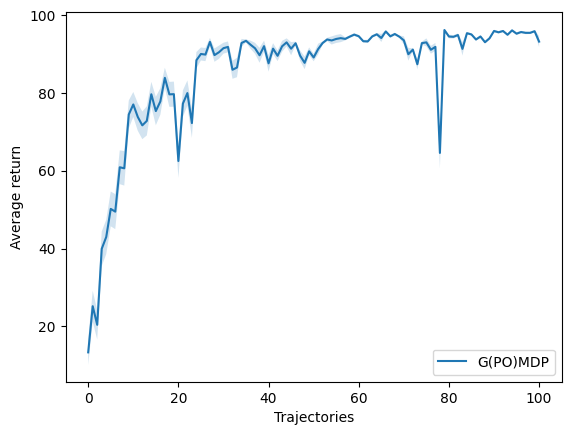

In [14]:
plot_results(results)